# Netflix-IMDb Machine Learning Final Project
## Alyx Cleveland and Tony Barrows

Let's first download and gather our data for review.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

This is a very large data set, so let's dispense with it as quickly as we can. We need to download the *names* data set in order to get the primary key, merge on the *ratings* data set, and finally merge that again with the *netflix* data set.

In [3]:
def load_data_live():
    ''' Load Netflix data set from disk. Load IMDb data sets from IMDb website. Merge on title, write merged
    version to disk.'''
    nflix = pd.read_csv("data/netflix_titles.csv")
    imdb_names = pd.read_csv("https://datasets.imdbws.com/title.basics.tsv.gz", compression='gzip', delimiter = "\t",
                            low_memory = False)
    imdb_ratings = pd.read_csv("https://datasets.imdbws.com/title.ratings.tsv.gz", compression = 'gzip', delimiter = "\t",
                              low_memory = False)

    # just need the unique id 'tconst'
    imdb_names = imdb_names[['tconst', 'originalTitle']]
    imdb = imdb_ratings.merge(imdb_names, how = 'left', on = 'tconst')

    nflix = nflix.merge(imdb, how = 'left', left_on = 'title', right_on = 'originalTitle')
    nflix.to_csv("data/nflix_merged.csv")
    
    return nflix

# only pull from by API if not on disk
try:
#    print('problem')
    nflix = pd.read_csv("../data/nflix_merged.csv")
except:
    nflix = load_data_live()

In [4]:
nflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tconst,averageRating,numVotes,originalTitle
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,tt2096351,7.8,2105.0,3%
1,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,tt4922804,7.4,22387.0,3%
2,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,tt5979312,5.9,582.0,7:19
3,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",tt2100376,4.6,862.0,23:59
4,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",tt0191312,6.0,72.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22680,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,tt3776484,6.1,396.0,Zubaan
22681,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,tt7368392,7.3,10.0,Zubaan
22682,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",NaN,NaN,NaN,NaN
22683,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,tt7239256,6.9,1892.0,Zumbo's Just Desserts


In [5]:
nflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22684
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22685 non-null  object 
 1   type           22685 non-null  object 
 2   title          22685 non-null  object 
 3   director       15520 non-null  object 
 4   cast           21059 non-null  object 
 5   country        21412 non-null  object 
 6   date_added     22628 non-null  object 
 7   release_year   22685 non-null  int64  
 8   rating         22678 non-null  object 
 9   duration       22685 non-null  object 
 10  listed_in      22685 non-null  object 
 11  description    22685 non-null  object 
 12  tconst         20576 non-null  object 
 13  averageRating  20576 non-null  float64
 14  numVotes       20576 non-null  float64
 15  originalTitle  20576 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 2.9+ MB


_______

TODO:
* Weight ratings by number of votes (or use as separate targets: i.e., num votes is measure of popularity)
    - Might be a relationship between number of votes and ratings

* Text pre-processing
* Feature selection
    - e.g., Ridge Regression or LASSO selection
* Algorithm definition
    - Write algorithms in pseducode (in LaTeX) -- likely forest methods
    - MSE or RMSE to describe bias-variance tradeoff 
    - Plot these.

*******

### Descriptives

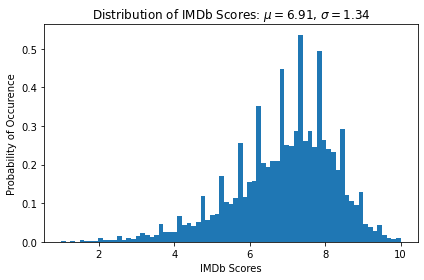

In [6]:
avg = np.mean(nflix['averageRating'])
sd = np.std(nflix['averageRating'])
title = 'Distribution of IMDb Scores: $\mu=$' + str(round(avg, 2)) + ', $\sigma=$' + str(round(sd, 2))

plt.hist(nflix['averageRating'], density = True, bins = 'auto')
plt.xlabel('IMDb Scores')
plt.ylabel('Probability of Occurence')
plt.title(title)

plt.tight_layout()
#plt.savefig('../out/imdb_histogram.png', dpi=600)
plt.show()

********

## Reshaping/Preprocessing

We want to change the structure of the data to substantially reduce the complexity of the input features. Let's first separate things into structures that make sense. This is mainly a text processing problem.

Split 'title' and 'description' by every space:

In [7]:
# make a copy
nflix_sub = nflix.copy()
nflix_sub['title'] = nflix_sub['title'].str.split(' ')
nflix_sub['title']

0                                                    [3%]
1                                                    [3%]
2                                                  [7:19]
3                                                 [23:59]
4                                                     [9]
                               ...                       
22680                                            [Zubaan]
22681                                            [Zubaan]
22682                              [Zulu, Man, in, Japan]
22683                           [Zumbo's, Just, Desserts]
22684    [ZZ, TOP:, THAT, LITTLE, OL', BAND, FROM, TEXAS]
Name: title, Length: 22685, dtype: object

We also want to remove unnecessary conjoining (i.e. 'stop') words and punctuation from the description in order to reduce its size and maximize its feature importance:

In [8]:
stop = text.ENGLISH_STOP_WORDS
nflix_sub['description'] = nflix_sub['description'].str.lower()
nflix_sub['description'] = nflix_sub['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
nflix_sub['description'] = nflix_sub['description'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
nflix_sub['description']

0        future elite inhabit island paradise far crowd...
1        future elite inhabit island paradise far crowd...
2        devastating earthquake hits mexico trapped sur...
3        army recruit fellow soldiers forced confront t...
4        postapocalyptic robots hide fear dangerous mac...
                               ...                        
22680    scrappy poor boy worms way dysfunctional facin...
22681    scrappy poor boy worms way dysfunctional facin...
22682    south african rapper nasty c hits stage street...
22683    dessert wizard adriano zumbo looks tense compe...
22684    documentary delves mystique trio explores enig...
Name: description, Length: 22685, dtype: object

In [9]:
nflix_sub['description'] = nflix_sub['description'].str.split(' ')
nflix_sub['description']

0        [future, elite, inhabit, island, paradise, far...
1        [future, elite, inhabit, island, paradise, far...
2        [devastating, earthquake, hits, mexico, trappe...
3        [army, recruit, fellow, soldiers, forced, conf...
4        [postapocalyptic, robots, hide, fear, dangerou...
                               ...                        
22680    [scrappy, poor, boy, worms, way, dysfunctional...
22681    [scrappy, poor, boy, worms, way, dysfunctional...
22682    [south, african, rapper, nasty, c, hits, stage...
22683    [dessert, wizard, adriano, zumbo, looks, tense...
22684    [documentary, delves, mystique, trio, explores...
Name: description, Length: 22685, dtype: object

Split cast on commas:

In [10]:
nflix_sub['cast'] = nflix_sub['cast'].str.split(',')
nflix_sub['cast']

0        [João Miguel,  Bianca Comparato,  Michel Gomes...
1        [João Miguel,  Bianca Comparato,  Michel Gomes...
2        [Demián Bichir,  Héctor Bonilla,  Oscar Serran...
3        [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...
4        [Elijah Wood,  John C. Reilly,  Jennifer Conne...
                               ...                        
22680    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
22681    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
22682                                            [Nasty C]
22683                        [Adriano Zumbo,  Rachel Khoo]
22684                                                  NaN
Name: cast, Length: 22685, dtype: object

Now, entries which were large text strings are now represented as lists of much smaller strings.

In [11]:
nflix_sub = nflix_sub[['title', 'director', 'cast', 'country', 'date_added', 'rating',
           'release_year', 'duration', 'description','averageRating', 'numVotes']]
#nflix_sub.to_csv('../data/nflix_sub.csv')

### Frequency of unique terms

### Encoding Data

In [23]:
nflix_sub = nflix_sub[nflix_sub['averageRating'].isna() == False] 

y = nflix_sub['averageRating'].values.ravel()
X = nflix_sub.drop(columns=['averageRating'])

#X = nflix.drop(columns = ['date_added', 'director'])

#X.info() #sanity check

print('Here!', nflix_sub['averageRating'].isna().sum())
   
#le = LabelEncoder()


X['cast_len'] = X['cast'].str.len()
X['des_len'] = X['description'].str.len()

all_cast = []
all_des = []

for entry in X['cast']:
    #print(entry)
    #print(type(entry))
    
    try:
        for i in range(len(entry)):
            word = entry[i]
            #print(word, type(word))
            #print(entry[i])
            all_cast.append(word)
    except:
        all_cast.append(entry)
        
#print(all_cast)
    
for entry in X['description']:
    #print(entry)
    #print(type(entry))
    
    try:
        for i in range(len(entry)):
            word = entry[i]
            #print(word, type(word))
            #print(entry[i])
            all_des.append(word)
    except:
        all_des.append(entry)
        
#print(all_des)
import pandas as pd



df = pd.DataFrame()
df['all_des'] = np.array(all_des)

#le = LabelEncoder()
#ac_enc = all_cast.str.split().apply(le.transform)

ac = pd.get_dummies(df)

#print(ac[0:5], type(ac))

#le = LabelEncoder()
#df['all_cast'] = df['all_cast'].apply(lambda col:le.fit_transform(col))    

#from sklearn.preprocessing import OneHotEncoder

#ac = OneHotEncoder().fit_transform(all_cast).toarray()

print(ac.head())




Here! 0
   all_des_aaliya  all_des_aamir  all_des_aang  all_des_aardman  \
0               0              0             0                0   
1               0              0             0                0   
2               0              0             0                0   
3               0              0             0                0   
4               0              0             0                0   

   all_des_aaron  all_des_abad  all_des_abagnale  all_des_abandoned  \
0              0             0                 0                  0   
1              0             0                 0                  0   
2              0             0                 0                  0   
3              0             0                 0                  0   
4              0             0                 0                  0   

   all_des_abandoning  all_des_abandonment  ...  all_des_zoologist  \
0                   0                    0  ...                  0   
1                   0 

### This is where I am trying to reconstruct descriptions for each movie after one hot encoding the words

In [39]:
#print(ac.info())
#print(len(all_des))


#ac #same length as number of cast.... sad

# description has less length!!!

#i = 0
#for n in range(len(X)):
#    j = len(X['description'][n])
#    X['description'][n] = ac[i:j]
#    print(type(X['description'][n])
#    i = j
#    #print(i)



    



KeyboardInterrupt: 

In [13]:
def sepdata(nonan_imp):
    '''separates numerical and categorical variables into subsets
    quant and qual'''    
    for name in nonan_imp.columns:
        if type(nonan_imp[name][1]) == str:
            nonan_imp[name] = nonan_imp[name].astype(str)
        elif type(nonan_imp[name][1]) == int:
            #print(name)
            nonan_imp[name] = nonan_imp[name].astype(int)
        else:
            #nonan_imp[name] = pd.to_numeric(nonan_imp[name])
            nonan_imp[name] = nonan_imp[name].astype(str)

    quant = nonan_imp.select_dtypes(['number', 'float', 'int'])
    #print(quant.head)
    qual = nonan_imp.select_dtypes(['object'])
    #print(qual.head)
    return quant, qual

def prep():
    ''' produces a clean dataframe of X predictors and the y response 
    also encodes categorical variables'''
    fulldf = X
    ''' cut needs to be value between 0 and 1'''
    #nonan = dropcolna(fulldf, cut*len(fulldf))
    #nonan_imp = impute(nonan, 'most_frequent') #can use median here    
    quant, qual = sepdata(X)    
    #nona_enc = nonan_imp
    X_enc = X

    '''
    encoding catergorical variables
    '''    
    le = LabelEncoder()
    X_enc[qual.columns] = X_enc[qual.columns].apply(lambda
                col:le.fit_transform(col))    
#    print(nona_enc.head)    

    #y = y.values.ravel()
    
    return X


#quant, qual = sepdata(X)
#X = prep()
#y = y.values.ravel()



def dropcolna(nonan):
    ''' takes full dataframe and drops columns with more missingness
    than the number, num, established by the cutoff later'''
    
    for feat in nonan.columns:
        if nonan[feat].isna().sum() > len(nonan):
            nonan.drop([feat], axis=1, inplace=True)
        else:
            '''sanity check for remaining nan'''
            print(feat, nonan[feat].isna().sum())
            pass
    print('new shape:', nonan.shape)
    return nonan

def impute(nonan):
    ''' imputes missing data by specified strategy, used 
    most frequent in this project'''
    values = nonan.values

    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')    
    transformed_X = imp.fit_transform(X)    
    nonan_imp = pd.DataFrame(transformed_X, 
                             columns = [item for item in nonan.columns])
#    nonan_imp['days_to_death'] = y
    ''' sanity check to make sure there is no missingness left'''    
    print(nonan_imp)    
    for feat in nonan_imp:
        print('Here!', feat, nonan_imp[feat].isna().sum())
    return nonan_imp 

X = prep()
#X = dropcolna(X)
#X_imp = impute(X)

In [33]:
X_imp = X

for feat in X_imp:
    print('Here!', feat, X_imp[feat].isna().sum())

print(X.info())





Here! title 0
Here! director 6398
Here! cast 1429
Here! country 961
Here! date_added 54
Here! rating 5
Here! release_year 0
Here! duration 0
Here! description 0
Here! numVotes 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20569 entries, 0 to 22676
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         20569 non-null  object 
 1   director      14171 non-null  object 
 2   cast          19140 non-null  object 
 3   country       19608 non-null  object 
 4   date_added    20515 non-null  object 
 5   rating        20564 non-null  object 
 6   release_year  20569 non-null  int64  
 7   duration      20569 non-null  object 
 8   description   20569 non-null  object 
 9   numVotes      20569 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 2.4+ MB
None


### Lasso

In [26]:
#Lasso Regression

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


def lasso(X, y):
            
#    param_grid = {'alpha': [0.001, 0.01, 0.1, 1],
#                  'fit_intercept':[True, False],
#                  'normalize':[True, False],
#                  'tol': [1e-4, 1e-5, 1e-6], 
#                  'warm_start': [True, False],
#                  'selection': ['cyclic', 'random'],}
#    
#    best_mod = GridSearchCV(linear_model.Lasso(),
#                            param_grid=param_grid,
#                            scoring='neg_mean_squared_error',cv=5,
#                            verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
#
#    param_grid = {'alpha': 0.001, 'fit_intercept': True, 'normalize': False,
#                  'selection': 'random', 'tol': 0.0001, 'warm_start': True}

    best_mod = linear_model.Lasso(alpha=0.001, fit_intercept=True, normalize=False,
                                 selection = 'random', tol = 0.0001, warm_start=False)

    mod = best_mod.fit(X,y)    
    #print(best_mod.best_params_)    
    #mod = best_mod.best_estimator_

    
    imp = pd.Series(mod.coef_, index = X.columns)
    
    #imp = imp[(imp > 0.2) | (imp < -0.2)].sort_values()        

    print(imp)
    plt.rcParams.update({'font.size': 30, 'figure.figsize':(10, 20)})
    plt.gcf().subplots_adjust(left=0.3)
    
    plt.barh(X.columns, mod.coef_, color='red')
    plt.grid(color='gray', which='major', axis='y', linestyle='--', alpha=0.5)        
    plt.xlabel('Feature Importance')
    #plt.savefig('../out/logreg_featimp.png', dpi = 400)
    plt.show()    
    
    return mod, imp.index

### Regression Tree

In [ ]:
def tree_reg(X, y, search):
    ''' decision tree regression model'''
    if search == True:
        param_grid = {'criterion': ['mse', 'friedman_mse', 'mae'],
              'splitter': ['best', 'random'],
              'min_samples_split': [0.001, 0.01, 0.1, 0.15],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1]}
        best_mod = GridSearchCV(tree.DecisionTreeRegressor(),
                                param_grid=param_grid,
                                scoring='neg_mean_squared_error',cv=5,
                                verbose=True, pre_dispatch='2*n_jobs', n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)
        mod = best_mod.best_estimator_
    else:
        mod = tree.DecisionTreeRegressor(criterion= 'mse', max_features= 'auto',
                                         min_impurity_decrease= 0.0,
                                         min_samples_split= 0.1,
                                         splitter= 'random')
    imp = pd.Series(mod.coef_, index = X.columns)
    
    #imp = imp[(imp > 0.2) | (imp < -0.2)].sort_values()        

    print(imp)
    plt.rcParams.update({'font.size': 30, 'figure.figsize':(10, 20)})
    plt.gcf().subplots_adjust(left=0.3)
    
    plt.barh(X.columns, mod.coef_, color='red')
    plt.grid(color='gray', which='major', axis='y', linestyle='--', alpha=0.5)        
    plt.xlabel('Feature Importance')
    #plt.savefig('../out/logreg_featimp.png', dpi = 400)
    plt.show()  
    
    return mod, imp.index

### SVM

In [ ]:
### Needs work


def supp_vec_reg(X, y, search): 
    ''' support vector regression model using boosted tree features,
    see run_models in oopmod.py'''
    if search == True:
        param_grid = {'kernel': ['linear', 'rbf']}
        
        best_mod = GridSearchCV(SVR(), param_grid=param_grid,
                                scoring='neg_mean_squared_error',
                                cv=5, verbose=True, pre_dispatch='2*n_jobs',
                                n_jobs=-1)
        best_mod.fit(X,y)    
        print(best_mod.best_params_)
        mod = best_mod.best_estimator_
    else:
        mod = SVR(kernel = 'linear')
    
    model = {'name':'SVR',
             'mod_type':mod.fit(X,y),
             'color':'purple'}
    return model

### Neural Net + SVM

### Model Scores

In [32]:
print(X.head(5))
#y = y.values.ravel()
print(type(y))



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
mod, idx = lasso(x_train, y_train)
#mod.score(x_test, y_test)
#mod, idx = tree_reg(x_train, y_train)
#mod.score(x_test, y_test)

     title           director  \
0     [3%]                NaN   
1     [3%]                NaN   
2   [7:19]  Jorge Michel Grau   
3  [23:59]       Gilbert Chan   
4      [9]        Shane Acker   

                                                cast        country  \
0  [João Miguel,  Bianca Comparato,  Michel Gomes...         Brazil   
1  [João Miguel,  Bianca Comparato,  Michel Gomes...         Brazil   
2  [Demián Bichir,  Héctor Bonilla,  Oscar Serran...         Mexico   
3  [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...      Singapore   
4  [Elijah Wood,  John C. Reilly,  Jennifer Conne...  United States   

          date_added rating  release_year   duration  \
0    August 14, 2020  TV-MA          2020  4 Seasons   
1    August 14, 2020  TV-MA          2020  4 Seasons   
2  December 23, 2016  TV-MA          2016     93 min   
3  December 20, 2018      R          2011     78 min   
4  November 16, 2017  PG-13          2009     80 min   

                                     

ValueError: setting an array element with a sequence.